<a href="https://colab.research.google.com/github/jumbokh/nknu-class/blob/main/CNN/notebooks/WithDriver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!ln -fs /content/gdrive/My\ Drive /app

In [3]:
!tar -xzvf /app/cuDNN/cudnn-10.0-linux-x64-v7.5.0.56.tgz -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h

# 檢查是否安裝成功
!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

cuda/include/cudnn.h
cuda/NVIDIA_SLA_cuDNN_Support.txt
cuda/lib64/libcudnn.so
cuda/lib64/libcudnn.so.7
cuda/lib64/libcudnn.so.7.5.0
cuda/lib64/libcudnn_static.a
#define CUDNN_MAJOR 7
#define CUDNN_MINOR 5
#define CUDNN_PATCHLEVEL 0
--
#define CUDNN_VERSION (CUDNN_MAJOR * 1000 + CUDNN_MINOR * 100 + CUDNN_PATCHLEVEL)

#include "driver_types.h"


In [4]:
import tensorflow as tf
cifar10 = tf.keras.datasets.cifar10

# 載入 cifar10 資料
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

# 訓練/測試資料的 X/y 維度
print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

170508288/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [5]:
# 轉成單色：rgb_to_grayscale
x_train = tf.image.rgb_to_grayscale(x_train)
x_test = tf.image.rgb_to_grayscale(x_test)
print(x_train.shape, x_test.shape)

(50000, 32, 32, 1) (10000, 32, 32, 1)


In [6]:
# 特徵縮放，使用常態化(Normalization)，公式 = (x - min) / (max - min)
x_train_norm, x_test_norm = x_train / 255, x_test / 255

In [7]:
# 建立模型
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=x_train.shape[1:3]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 模型訓練
history = model.fit(x_train_norm, y_train, epochs=10, validation_split=0.2)

# 評分(Score Model)
score=model.evaluate(x_test_norm, y_test, verbose=0)

for i, x in enumerate(score):
    print(f'{model.metrics_names[i]}: {score[i]:.4f}')

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1250/1250 [==============================] - 4s 3ms/step - loss: 2.1346 - accuracy: 0.2099 - val_loss: 2.0446 - val_accuracy: 0.2643
Epoch 2/10
1250/1250 [==============================] - 3s 3ms/step - loss: 2.0581 - accuracy: 0.2475 - val_loss: 2.0032 - val_accuracy: 0.2849
Epoch 3/10
1250/1250 [==============================] - 4s 3ms/step - loss: 2.0279 - accuracy: 0.2614 - val_loss: 1.9696 - val_accuracy: 0.2953
Epoch 4/10
1250/1250 [==============================] - 4s 3ms/step - loss: 2.0036 - accuracy: 0.2692 - val_loss: 1.9425 - val_accuracy: 0.3030
Epoch 5/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9840 - accuracy: 0.2780 - val_loss: 1.9213 - val_accuracy: 0.3039
Epoch 6/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9668 - accuracy: 0.2846 - val_loss: 1.9108 - val_accuracy: 0.3143
Epoch 7/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9577 - accuracy: 0.2849 - val_loss: 1.9028 - val_accuracy: 0.3185
Epo

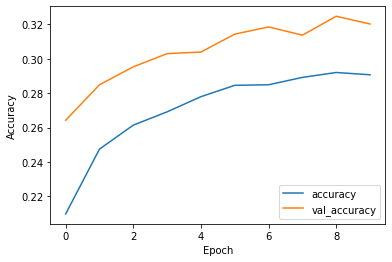

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               131200    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 132,490
Trainable params: 132,490
Non-trainable params: 0
_________________________________________________________________
